# Step 2: Clustering and Representative Sequence Selection
Now that we have identified potential xylanase sequences, we need to:
1. Cluster highly similar sequences using CD-HIT.
2. Select representative sequences from each cluster.


### 1. Install CD-HIT (if not already installed)

In [ ]:
!conda install -c bioconda cd-hit -y

### 2. Running CD-HIT to Cluster Protein Sequences
CD-HIT clusters sequences based on similarity thresholds. Here, we use 97% identity to group similar xylanase sequences.
Explanation of Parameters:
- i translated_proteins.fasta → Input file (from Step 1).
- o clustered_xylanase.fasta → Output file (clustered sequences).
- c 0.97 → 97% similarity threshold.
- n 5 → Word size for clustering (recommended for protein sequences).
- d 0 → No description in output, keeping it compact.

In [98]:
def get_sequence_lengths(fasta_file):
    lengths = []
    with open(fasta_file, "r") as f:
        seq = ""
        for line in f:
            if line.startswith(">"):
                if seq:
                    lengths.append(len(seq))
                seq = ""
            else:
                seq += line.strip()
        if seq:
            lengths.append(len(seq))
    return lengths

# Check sequence lengths
lengths = get_sequence_lengths("step1/filtered_contigs.fasta")
print("Lengths for Contigs:")
print("Min Length:", min(lengths))
print("Max Length:", max(lengths))
print("Average Length:", sum(lengths)/len(lengths))
# Check sequence lengths
lengths = get_sequence_lengths("step1/translated_proteins.fasta")
print("Lengths for Proteins:")
print("Min Length:", min(lengths))
print("Max Length:", max(lengths))
print("Average Length:", sum(lengths)/len(lengths))

Lengths for Contigs:
Min Length: 200
Max Length: 114777
Average Length: 2003.021436630312
Lengths for Proteins:
Min Length: 1
Max Length: 2358
Average Length: 67.62986247544204


In [106]:
# Run CD-HIT for nucleotide sequences (97% similarity)
!cd-hit -i step1/filtered_contigs.fasta -o step2/clustered_contigs.fasta -c 0.85 -n 5 -d 0

Program: CD-HIT, V4.8.1 (+OpenMP), Nov 12 2024, 10:35:24
Command: cd-hit -i step1/filtered_contigs.fasta -o
         step2/clustered_contigs.fasta -c 0.85 -n 5 -d 0

Started: Sat Feb  8 01:59:53 2025
                            Output                              
----------------------------------------------------------------
total seq: 2659
longest and shortest : 114777 and 200
Total letters: 5326034
Sequences have been sorted

Approximated minimal memory consumption:
Sequence        : 5M
Buffer          : 1 X 40M = 40M
Table           : 1 X 65M = 65M
Miscellaneous   : 0M
Total           : 111M

Table limit with the given memory limit:
Max number of representatives: 40000
Max number of word counting entries: 86054096

comparing sequences from          0  to       2659
..
     2659  finished       1948  clusters

Approximated maximum memory consumption: 120M
writing new database
writing clustering information
program completed !

Total CPU time 1242.21


In [107]:
!head -n 20 step2/clustered_contigs.fasta.clstr

>Cluster 0
0	114777aa, >k141_5887132... *
>Cluster 1
0	83946aa, >k141_4531163... *
1	878aa, >k141_478242... at 85.65%
>Cluster 2
0	77918aa, >k141_7527229... *
>Cluster 3
0	75030aa, >k141_7519112... *
>Cluster 4
0	67901aa, >k141_5247607... *
>Cluster 5
0	66286aa, >k141_4531601... *
1	351aa, >k141_4680156... at 85.19%
>Cluster 6
0	65585aa, >k141_6101445... *
1	1488aa, >k141_5461389... at 88.58%
2	283aa, >k141_3897096... at 86.22%
3	547aa, >k141_3919179... at 85.01%
4	227aa, >k141_9419534... at 87.22%


### 3. Extract Representative Sequences
CD-HIT generates:
- **`clustered_xylanase.fasta`** → Clustered non-redundant sequences.
- **`clustered_xylanase.fasta.clstr`** → Cluster information file.

We need to extract the **longest sequence from each cluster** as the **representative sequence**.

In [108]:
!grep '>' step2/clustered_contigs.fasta | cut -d' ' -f1 | sed 's/>//' > step2/representative_contigs.txt
!seqkit grep -f step2/representative_contigs.txt step1/filtered_contigs.fasta > step2/representative_contigs.fasta

[INFO] 1948 patterns loaded from file


**Explanation:**
- `grep '>' clustered_xylanase.fasta` → Extract headers from clustered file.
- `cut -d' ' -f1` → Keep only sequence names.
- `sed 's/>//'` → Remove `>` symbols.
- `seqkit grep -f representatives.txt translated_proteins.fasta` → Extract full sequences for representative sequences.

In [109]:
# Function to print first 10 lines of a file
def print_file_head(filename, num_lines=10):
    try:
        with open(filename, "r") as f:
            for _ in range(num_lines):
                print(f.readline().strip())
    except FileNotFoundError:
        print(f"File {filename} not found!")

# Print results
print("Clustered Contigs:")
print_file_head("step2/clustered_contigs.fasta")

print("\nRepresentative Sequences:")
print_file_head("step2/representative_contigs.fasta")


Clustered Contigs:
>k141_3842622
GATGCTTTGCTGGGAGGCTCAGCACGACTGATTTCAGTTTCTCAGGCAAAGAATCGCGGATATTATATCCCAGACAATTATCGTGAGTCTTATGTACCTGAAATCAACTTCAATACAGTTGATGAGGTAATGAAAATCTGCTACAACAACGGACTTAAGATGAGAGCTCATACTTTGGTATGGCACTCACAGACACCATCATGGTTTTTCAGAAATAACTATGCTGGAAACGGTGGATTTGTAAATCAGCAGACAATGGATGCTCGTCTTGAAATGTACGTAAAGACAGTAATGAATCATGTATATTTGAACCAGTATGGTAGTGTTGTGTATGCATGGGATGTTGCCAATGAAATCCTTCATGCACAAAACTCAGGCTGGGAAGCAGTATATGGAAACAATAAGGTAAATGCAACTTATGTAAAGAAGGCATTTAACTATGCATATCAGACACTTGAGTATTTCAAGCTTACAGATTCAGTTAAGCTTTTCTACAATGACTACAACACATACATGGTAGTTAATGATGCTATCACACTTATCAACTATATCAACCAGGGCAAAAAGGTCTGCGCAGGTATCGGTA
>k141_3522370
CTAATCCCAATTGAAGCACTTTAGATGCAGGTTCCACAAAACCATCTCTGTTTTGTACCACATCAATCAACACATTTGCATCAAGGAAAATCTTTGTTGCCATCACTTACATGTATTTTTCAGATGTTACGGCGACCAGATATCATCCATGTCCTCCTTGTCAAAGAATGACAGCATTTTCTCTTTGGCATCATCTTCCGTACCGTTAAGGTACTTGGCAAAGACCGACATTATTTCATCTTGTGACAGGCTGGAGCAGTACGATGCGTATTTGATGGCCTGCCATGTTACATCACGTCCTGAGTCATCGAGTTTGTTCTCAATCACCACCAGCTTCCCCTCCTTGTCAAGTGCCAGCAGGTCGAG

In [113]:
import pandas as pd

# Read the clustering result file
clstr_file = "step2/clustered_contigs.fasta.clstr"

clusters = []
cluster_id = None

# Parse the clustering file
with open(clstr_file, "r") as f:
    for line in f:
        if line.startswith(">Cluster"):
            cluster_id = line.strip()
        else:
            clusters.append([cluster_id, line.strip()])

# Convert to Pandas DataFrame
df = pd.DataFrame(clusters, columns=["Cluster", "Sequence Info"])

# Display the table
df.head(20)  # Show the first 20 rows


,Cluster,Sequence Info
0,>Cluster 0,"0\t114777aa, >k141_5887132... *"
1,>Cluster 1,"0\t83946aa, >k141_4531163... *"
2,>Cluster 1,"1\t878aa, >k141_478242... at 85.65%"
3,>Cluster 2,"0\t77918aa, >k141_7527229... *"
4,>Cluster 3,"0\t75030aa, >k141_7519112... *"
5,>Cluster 4,"0\t67901aa, >k141_5247607... *"
6,>Cluster 5,"0\t66286aa, >k141_4531601... *"
7,>Cluster 5,"1\t351aa, >k141_4680156... at 85.19%"
8,>Cluster 6,"0\t65585aa, >k141_6101445... *"
9,>Cluster 6,"1\t1488aa, >k141_5461389... at 88.58%"


In [114]:
from collections import defaultdict

cluster_counts = defaultdict(int)

with open("step2/clustered_contigs.fasta.clstr", "r") as f:
    current_cluster = None
    for line in f:
        if line.startswith(">Cluster"):
            current_cluster = line.strip()
        else:
            cluster_counts[current_cluster] += 1

# Convert to Pandas DataFrame
df_summary = pd.DataFrame(cluster_counts.items(), columns=["Cluster", "Number of Sequences"])

# Display the summary table
df_summary.head(20)  # Show the first 20 rows


,Cluster,Number of Sequences
0,>Cluster 0,1
1,>Cluster 1,2
2,>Cluster 2,1
3,>Cluster 3,1
4,>Cluster 4,1
5,>Cluster 5,2
6,>Cluster 6,6
7,>Cluster 7,23
8,>Cluster 8,32
9,>Cluster 9,1


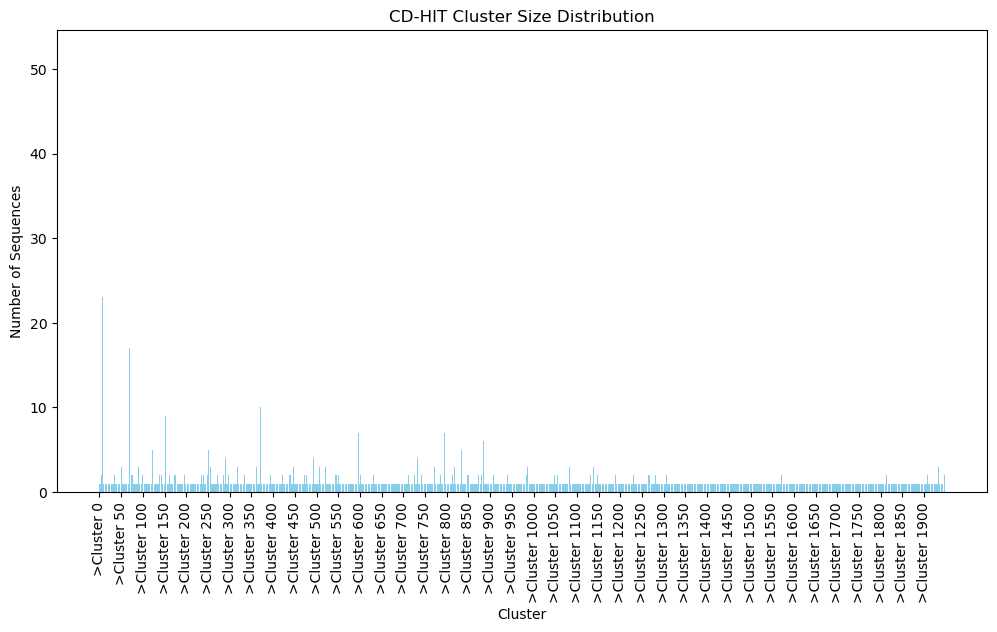

In [118]:
import matplotlib.pyplot as plt
import numpy as np

# Plot cluster sizes
plt.figure(figsize=(12, 6))  # Increase figure size

# Plot bar chart
plt.bar(df_summary["Cluster"], df_summary["Number of Sequences"], color='skyblue')

# Show only every nth label to reduce clutter
n = 50  # Adjust this number as needed
plt.xticks(np.arange(0, len(df_summary["Cluster"]), step=n), 
           df_summary["Cluster"][::n], 
           rotation=90)  # Rotate labels

# Axis labels and title
plt.xlabel("Cluster")
plt.ylabel("Number of Sequences")
plt.title("CD-HIT Cluster Size Distribution")

plt.show()


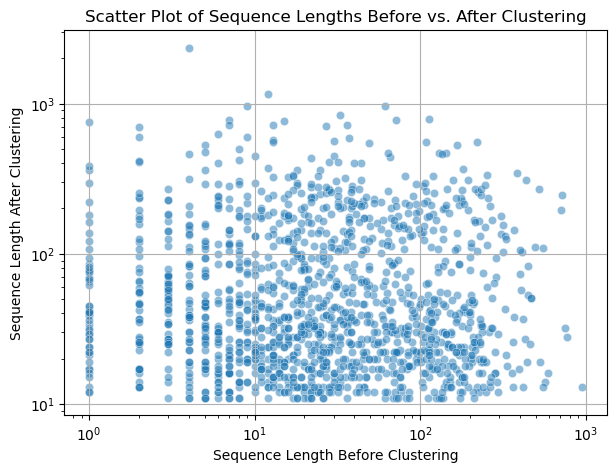

In [191]:
import pandas as pd
import seaborn as sns

# Function to get sequence lengths from a FASTA file
def get_sequence_lengths(fasta_file):
    lengths = []
    with open(fasta_file, "r") as f:
        seq = ""
        for line in f:
            if line.startswith(">"):
                if seq:
                    lengths.append(len(seq))
                seq = ""
            else:
                seq += line.strip()
        if seq:
            lengths.append(len(seq))
    return lengths

# Get sequence lengths before and after clustering
before_lengths = get_sequence_lengths("step1/translated_proteins.fasta")
after_lengths = get_sequence_lengths("step2/representative_proteins.fasta")

# Create a DataFrame
df_lengths = pd.DataFrame({"Before Clustering": before_lengths[:len(after_lengths)], 
                           "After Clustering": after_lengths})

# Scatter plot
plt.figure(figsize=(7, 5))
sns.scatterplot(x=df_lengths["Before Clustering"], y=df_lengths["After Clustering"], alpha=0.5)
plt.xlabel("Sequence Length Before Clustering")
plt.ylabel("Sequence Length After Clustering")
plt.title("Scatter Plot of Sequence Lengths Before vs. After Clustering")
plt.xscale("log")
plt.yscale("log")
plt.grid(True)
plt.savefig("images/seq_length_before_after_proteins.png")
plt.show()


In [119]:
# Run CD-HIT for protein sequences (if applicable)
!cd-hit -i step1/translated_proteins.fasta -o step2/clustered_proteins.fasta -c 0.70 -n 3 -d 0

Program: CD-HIT, V4.8.1 (+OpenMP), Nov 12 2024, 10:35:24
Command: cd-hit -i step1/translated_proteins.fasta -o
         step2/clustered_proteins.fasta -c 0.70 -n 3 -d 0

Started: Sat Feb  8 02:27:48 2025
                            Output                              
----------------------------------------------------------------
Your word length is 3, using 5 may be faster!
total seq: 1817
longest and shortest : 2358 and 11
Total letters: 168514
Sequences have been sorted

Approximated minimal memory consumption:
Sequence        : 0M
Buffer          : 1 X 16M = 16M
Table           : 1 X 0M = 0M
Miscellaneous   : 0M
Total           : 17M

Table limit with the given memory limit:
Max number of representatives: 2782481
Max number of word counting entries: 97859186

comparing sequences from          0  to       1817
.
     1817  finished       1416  clusters

Approximated maximum memory consumption: 18M
writing new database
writing clustering information
program completed !

Total CPU t

In [120]:
!head -n 20 step2/clustered_proteins.fasta.clstr

>Cluster 0
0	2358aa, >k141_2357594... *
>Cluster 1
0	198aa, >k141_9031299... at 77.78%
1	1160aa, >k141_4340043... *
>Cluster 2
0	956aa, >k141_966364... *
1	155aa, >k141_6822803... at 70.32%
>Cluster 3
0	198aa, >k141_2005421... at 78.79%
1	144aa, >k141_7802339... at 78.47%
2	956aa, >k141_1778842... *
>Cluster 4
0	836aa, >k141_118972... *
>Cluster 5
0	102aa, >k141_961282... at 85.29%
1	794aa, >k141_6564741... *
2	462aa, >k141_2734549... at 70.35%
>Cluster 6
0	775aa, >k141_3934590... *


In [121]:
!grep '>' step2/clustered_proteins.fasta | cut -d' ' -f1 | sed 's/>//' > step2/representative_proteins.txt
!seqkit grep -f step2/representative_proteins.txt step1/translated_proteins.fasta > step2/representative_proteins.fasta

[INFO] 1416 patterns loaded from file


In [122]:
# Print results
print("Clustered Contigs:")
print_file_head("step2/clustered_proteins.fasta")

print("\nRepresentative Sequences:")
print_file_head("step2/representative_proteins.fasta")


Clustered Contigs:
>k141_960819
IDDFEIKGDSSTVDDSVPALKDKYKSHFKFGTATVVDELTPKNTQQLILNQFNSLTIGNELKPDYLLDKDATL
>k141_3842622
DALLGGSARLISVSQAKNRGYYIPDNYRESYVPEINFNTVDEVMKICYNNGLKMRAHTLVWHSQTPSWFFRNNYAGNGGFVNQQTMDARLEMYVKTVMNHVYLNQYGSVVYAWDVANEILHAQNSGWEAVYGNNKVNATYVKKAFNYAYQTLEYFKLTDSVKLFYNDYNTYMVVNDAITLINYINQGKKVCAGIG
>k141_4162895
DIDVAHVVGNVQQQETACHRGLDVHAHVLPLVVEGEAHIRAAAPVADTAVQLARLGTLDGHCHLVGLARLQQDVVHGHELHLPGP
>k141_2561960
QAWYLCLQEGSSHCNADRRTTLGSGCATQGYVRALRYRLPLQPQDKALPFQK
>k141_6724776
AAVQNILKRDFAAVTFGNEMKHDAIVQSDGRYNFASADEMAGWADACGNDLFGHTLGWHSQQRRDYLDAVISKAVPNNDASLLQKNWNLEEGTLDGFVADGFKVISSLYDVFAGEYAAKAVSDGASLQMDAAIEADKAYDVSFWAKTLDAEGSVKIVSGEGQEAETPVSKSWNKYSVTIPVKAAGEFSYRLVASKDVVIDNIRVIGADGSSPSASFWTGNDLGGELVNDA

Representative Sequences:
>k141_960819
IDDFEIKGDSSTVDDSVPALKDKYKSHFKFGTATVVDELTPKNTQQLILNQFNSLTIGNE
LKPDYLLDKDATL
>k141_3842622
DALLGGSARLISVSQAKNRGYYIPDNYRESYVPEINFNTVDEVMKICYNNGLKMRAHTLV
WHSQTPSWFFRNNYAGNGGFVNQQTMDARLEMYVKTVMNHVYLNQYGSVVYAWDVANEIL
HAQNSGWEAVYGNNKVNATYV

In [123]:
import pandas as pd

# Read the clustering result file
clstr_file = "step2/clustered_proteins.fasta.clstr"

clusters = []
cluster_id = None

# Parse the clustering file
with open(clstr_file, "r") as f:
    for line in f:
        if line.startswith(">Cluster"):
            cluster_id = line.strip()
        else:
            clusters.append([cluster_id, line.strip()])

# Convert to Pandas DataFrame
df = pd.DataFrame(clusters, columns=["Cluster", "Sequence Info"])

# Display the table
df.head(20)  # Show the first 20 rows


,Cluster,Sequence Info
0,>Cluster 0,"0\t2358aa, >k141_2357594... *"
1,>Cluster 1,"0\t198aa, >k141_9031299... at 77.78%"
2,>Cluster 1,"1\t1160aa, >k141_4340043... *"
3,>Cluster 2,"0\t956aa, >k141_966364... *"
4,>Cluster 2,"1\t155aa, >k141_6822803... at 70.32%"
5,>Cluster 3,"0\t198aa, >k141_2005421... at 78.79%"
6,>Cluster 3,"1\t144aa, >k141_7802339... at 78.47%"
7,>Cluster 3,"2\t956aa, >k141_1778842... *"
8,>Cluster 4,"0\t836aa, >k141_118972... *"
9,>Cluster 5,"0\t102aa, >k141_961282... at 85.29%"


In [124]:
from collections import defaultdict

cluster_counts = defaultdict(int)

with open("step2/clustered_proteins.fasta.clstr", "r") as f:
    current_cluster = None
    for line in f:
        if line.startswith(">Cluster"):
            current_cluster = line.strip()
        else:
            cluster_counts[current_cluster] += 1

# Convert to Pandas DataFrame
df_summary = pd.DataFrame(cluster_counts.items(), columns=["Cluster", "Number of Sequences"])

# Display the summary table
df_summary.head(20)  # Show the first 20 rows


,Cluster,Number of Sequences
0,>Cluster 0,1
1,>Cluster 1,2
2,>Cluster 2,2
3,>Cluster 3,3
4,>Cluster 4,1
5,>Cluster 5,3
6,>Cluster 6,1
7,>Cluster 7,1
8,>Cluster 8,3
9,>Cluster 9,2


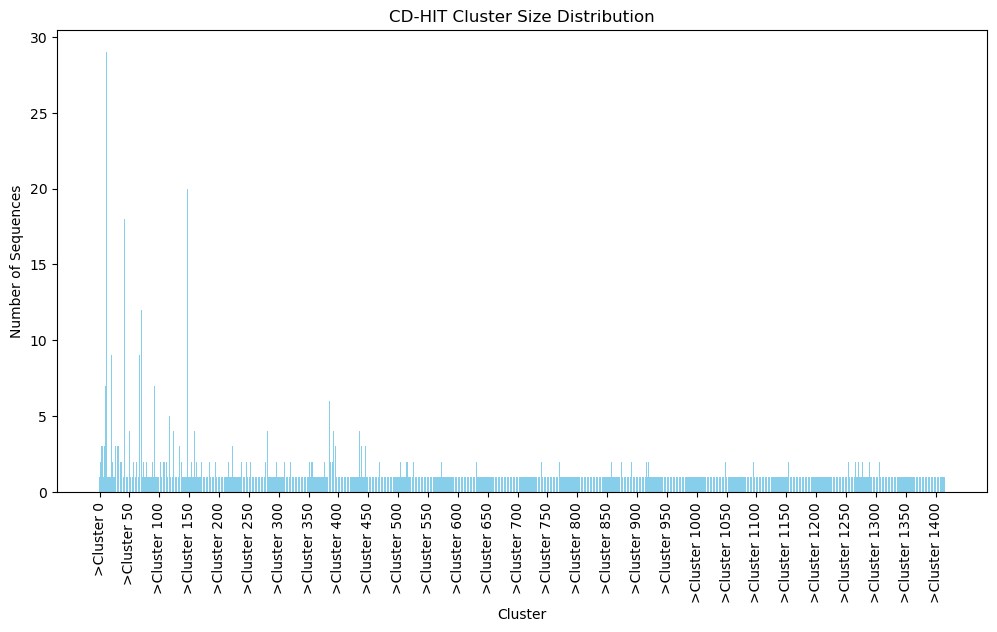

In [125]:
import matplotlib.pyplot as plt
import numpy as np

# Plot cluster sizes
plt.figure(figsize=(12, 6))  # Increase figure size

# Plot bar chart
plt.bar(df_summary["Cluster"], df_summary["Number of Sequences"], color='skyblue')

# Show only every nth label to reduce clutter
n = 50  # Adjust this number as needed
plt.xticks(np.arange(0, len(df_summary["Cluster"]), step=n), 
           df_summary["Cluster"][::n], 
           rotation=90)  # Rotate labels

# Axis labels and title
plt.xlabel("Cluster")
plt.ylabel("Number of Sequences")
plt.title("CD-HIT Cluster Size Distribution")

plt.show()


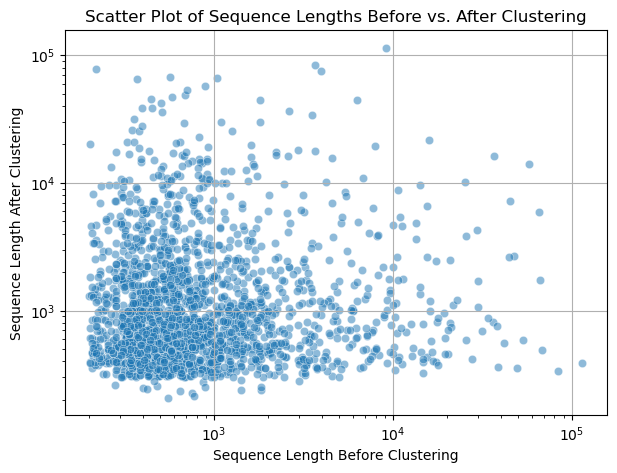

In [192]:
import pandas as pd
import seaborn as sns

# Function to get sequence lengths from a FASTA file
def get_sequence_lengths(fasta_file):
    lengths = []
    with open(fasta_file, "r") as f:
        seq = ""
        for line in f:
            if line.startswith(">"):
                if seq:
                    lengths.append(len(seq))
                seq = ""
            else:
                seq += line.strip()
        if seq:
            lengths.append(len(seq))
    return lengths

# Get sequence lengths before and after clustering
before_lengths = get_sequence_lengths("step1/filtered_contigs.fasta")
after_lengths = get_sequence_lengths("step2/representative_contigs.fasta")

# Create a DataFrame
df_lengths = pd.DataFrame({"Before Clustering": before_lengths[:len(after_lengths)], 
                           "After Clustering": after_lengths})

# Scatter plot
plt.figure(figsize=(7, 5))
sns.scatterplot(x=df_lengths["Before Clustering"], y=df_lengths["After Clustering"], alpha=0.5)
plt.xlabel("Sequence Length Before Clustering")
plt.ylabel("Sequence Length After Clustering")
plt.title("Scatter Plot of Sequence Lengths Before vs. After Clustering")
plt.xscale("log")
plt.yscale("log")
plt.grid(True)
plt.savefig("images/seq_length_before_after_contigs.png")
plt.show()
